In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def seperator():
    print('\n')
    temp = ''
    for i in range(30):
        temp += '-'
    return temp + "DEVIDER" + temp
divider = seperator()

### Data Info

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
alldata = pd.concat([train, test], axis = 0).reset_index()
print(alldata.head())
print(divider)
description = alldata.describe()
print(description)

index   Age Cabin Embarked     Fare  \
0      0  22.0   NaN        S   7.2500   
1      1  38.0   C85        C  71.2833   
2      2  26.0   NaN        S   7.9250   
3      3  35.0  C123        S  53.1000   
4      4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male 

What we can get from the data description above is that:

1. 38.38% passengers survived

2. Most of the passengers are in class 3

3. Except for None data, most of the passengers are young people: The mean age is 29.70, and the middle is 28. Most of the passengers have one sibling.

### Detect null Data

In [4]:
print('Data Shape:' + str(alldata.shape))
print('Nulls in every column')
alldata.isnull().sum(axis = 0)

Data Shape:(1309, 13)
Nulls in every column


index             0
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### Clean unuseful columns
There are too much null data in column Cabin, just drop it. Name is also not helpful, drop it as well.

In [5]:
alldata = alldata.drop(['Name', 'Cabin'], axis = 1)

## Data Visualization

### Single Feature Detection

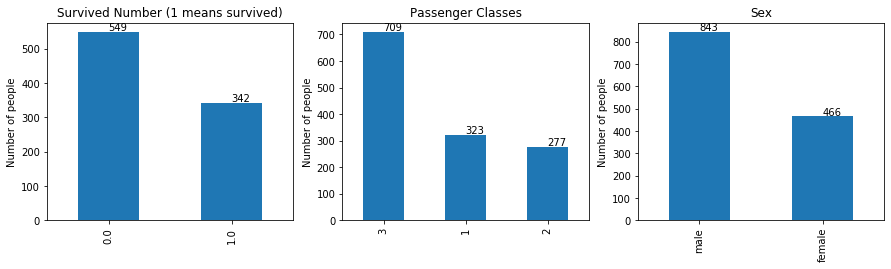

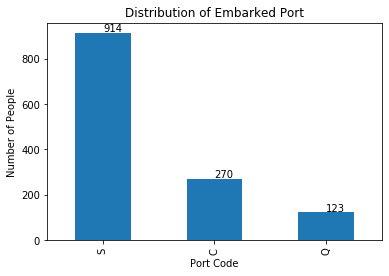

In [6]:
single_feature = plt.figure(figsize=(15,8))

sig_f1=single_feature.add_subplot(2,3,1)
survive = alldata.Survived.value_counts()
survive.plot(kind = 'bar')
plt.title('Survived Number (1 means survived)')
plt.ylabel('Number of people')
for idx, data in enumerate(survive.values):
    plt.text(x = idx, y = data + 5, s = str(data))

sig_f2=single_feature.add_subplot(2,3,2)
pclass = alldata.Pclass.value_counts()
pclass.plot(kind = 'bar')
plt.title('Passenger Classes')
plt.ylabel('Number of people')
for idx, data in enumerate(pclass.values):
    plt.text(x = idx, y = data + 5, s = str(data))

sig_f3=single_feature.add_subplot(2,3,3)
sex = alldata.Sex.value_counts()
sex.plot(kind = 'bar')
plt.title('Sex')
plt.ylabel('Number of people')
for idx, data in enumerate(sex.values):
    plt.text(x = idx, y = data + 5, s = str(data))
plt.show()

embark = single_feature.add_subplot(2, 1, 2)
embark = alldata.Embarked.value_counts()
embark.plot(kind = 'bar')
plt.title('Distribution of Embarked Port')
plt.ylabel('Number of People')
plt.xlabel('Port Code')
for idx, data in enumerate(embark.values):
    plt.text(x = idx, y = data + 5, s = str(data))
plt.show()

### Relationship Between Survival and Different Variables

Survived  Dead
1       136    80
2        87    97
3       119   372


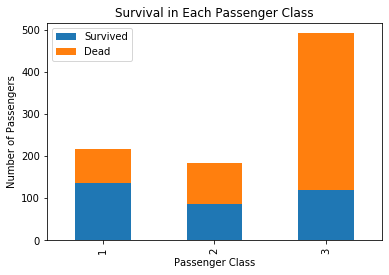

In [7]:
pclass_live = alldata.Pclass[alldata.Survived == 1].value_counts()
pclass_dead = alldata.Pclass[alldata.Survived == 0].value_counts()
pclass_survive = pd.DataFrame({'Survived':pclass_live, 'Dead':pclass_dead})
print(pclass_survive)
pclass_survive.plot.bar(stacked = True)
plt.title('Survival in Each Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

Survived  Dead
female       233    81
male         109   468


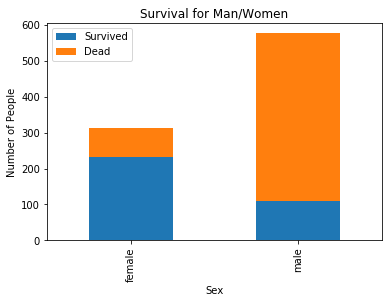

In [8]:
sex_live = alldata.Sex[alldata.Survived == 1].value_counts()
sex_dead = alldata.Sex[alldata.Survived == 0].value_counts()
sex_survive = pd.DataFrame({'Survived':sex_live, 'Dead':sex_dead})
print(sex_survive)
sex_survive.plot.bar(stacked = True)
plt.title('Survival for Man/Women')
plt.xlabel('Sex')
plt.ylabel('Number of People')
plt.show()

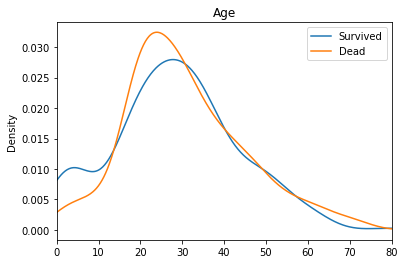

In [9]:
plt.xlim(0,80)
age_live = alldata.Age[alldata.Survived == 1].plot(kind='kde')
age_dead = alldata.Age[alldata.Survived == 0].plot(kind='kde')
plt.title('Age')
plt.legend(['Survived', 'Dead'])
plt.show()

What we can find from the relationship between survival and different variables：

1. Survival rate in different passenger class: Class 1 > Class 2 > Class 3

2. The survival rate for women is larger than men

3. People under 15 years old hav higher survival rate than others, while those between 20 and 30 gets lower survival rate

Combine data of family members onboard together

In [10]:
alldata['Family'] = alldata['SibSp'] + alldata['Parch']

Analyze the relationship between the number of family menbers onboard and survival:

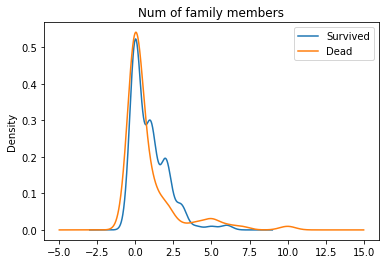

In [11]:
family_live = alldata.Family[alldata.Survived == 1].plot(kind='kde')
family_dead = alldata.Family[alldata.Survived == 0].plot(kind='kde')
plt.title('Num of family members')
plt.legend(['Survived', 'Dead'])
plt.show()

It seems that number of family have very less relationship with survival rate

Fill the missing value

In [12]:
alldata['Embarked'].fillna('S', inplace = True)
alldata['Age'].fillna(alldata['Age'].mean(), inplace = True)
alldata.isnull().sum(axis = 0)

index            0
Age              0
Embarked         0
Fare             1
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Family           0
dtype: int64

Now use models to analyze

In [13]:
from sklearn import *

In [14]:
x = alldata[:len(train)][['Pclass', 'Sex', 'Age', 'Embarked', 'Family']]
y = alldata[:len(train)]['Survived']
dvec = feature_extraction.DictVectorizer(sparse=False)
x_train=dvec.fit_transform(x.to_dict(orient='record'))

In [15]:
sv = svm.SVC()
dtc = tree.DecisionTreeClassifier()
rfc = ensemble.RandomForestClassifier()
lg = linear_model.LogisticRegression()
nb = naive_bayes.MultinomialNB()
knn = neighbors.KNeighborsClassifier()
adab = ensemble.AdaBoostClassifier()

print('SVM acc:', np.mean(model_selection.cross_val_score(sv, x_train, y, cv = 10)))
print('Decision Tree acc:', np.mean(model_selection.cross_val_score(dtc, x_train, y, cv = 10)))
print('Rendom Forest acc:', np.mean(model_selection.cross_val_score(rfc, x_train, y, cv = 10)))
print('Logistic Regression:', np.mean(model_selection.cross_val_score(lg, x_train, y, cv = 10)))
print('KNN acc:', np.mean(model_selection.cross_val_score(knn, x_train, y, cv = 10)))
print('Adaboost acc:', np.mean(model_selection.cross_val_score(adab, x_train, y, cv = 10)))

SVM acc: 0.6386392009987516
Decision Tree acc: 0.7834706616729088
Rendom Forest acc: 0.8048439450686642
Logistic Regression: 0.7968664169787766
KNN acc: 0.8048189762796504
Adaboost acc: 0.8114606741573034


In [16]:
x_test = alldata[len(train):][['Pclass', 'Sex', 'Age', 'Embarked', 'Family']]
print(x_test)
x_test = dvec.transform(x_test.to_dict(orient='record'))

adab.fit(x_train, y)
y_predict = adab.predict(x_test)
result = {'PassengerId': alldata[len(train):]['PassengerId'],
          'Survived': y_predict}
result = pd.DataFrame(result)
result.to_csv('submission.csv',index=False)

Pclass     Sex        Age Embarked  Family
891        3    male  34.500000        Q       0
892        3  female  47.000000        S       1
893        2    male  62.000000        Q       0
894        3    male  27.000000        S       0
895        3  female  22.000000        S       2
...      ...     ...        ...      ...     ...
1304       3    male  29.881138        S       0
1305       1  female  39.000000        C       0
1306       3    male  38.500000        S       0
1307       3    male  29.881138        S       0
1308       3    male  29.881138        C       2

[418 rows x 5 columns]
